In [2]:
## import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.special import expit
from experiment_constant import *

In [3]:
W1 = np.ones((3, 2))
W2 = np.ones((2, 1))
B1 = np.zeros((2, 1))
B2 = np.zeros((1, 1))
experiment = ConstantExperiment([3, 2, 1], 0.1, 1, [W1, W2], [B1, B2], do_print = True)
mean_bound, std_bound = experiment.get_mean_std_error()

Creating network for 3-dimensional input and 1-dimensional output, with 1 hidden layers


The resulting random variable is $|2-\xi| \cdot \sigma(4Kx\cdot 3)$, $\xi\sim Bin(2, 1 - p)$.

It is $\sim \eta\cdot\sigma(12)$ where $\eta\sim Bin(2, p)$

$\mathbb{E}\eta=2p=0.2$
$\mathbb{E}\eta^2=2p(1-p)+4p^2=2p-2p^2+4p^2=2p+2p^2=2p(p+1)$

In [12]:
p = 0.1
assert np.allclose([mean_bound, std_bound ** 2], [2 * p, 2 * p * (p + 1)]), "Exact value for theoretical bound"

Mean error 0.20728, 103.64% from theoretical, norm 0.78
Mean error 0.20805, 104.03% from theoretical, norm 0.72
Mean error 0.21231, 106.15% from theoretical, norm 0.77
Mean error 0.21190, 105.95% from theoretical, norm 0.92
Mean error 0.21136, 105.68% from theoretical, norm 1.04
Mean error 0.21048, 105.24% from theoretical, norm 1.06
Mean error 0.21139, 105.70% from theoretical, norm 1.02
Mean error 0.21150, 105.75% from theoretical, norm 1.07
Mean error 0.20780, 103.90% from theoretical, norm 1.09
Mean error 0.21116, 105.58% from theoretical, norm 1.11


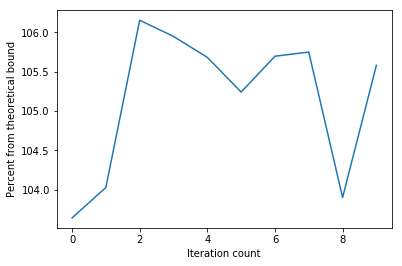

In [6]:
# Trying genetic search for x
np.random.seed(42)

# Setting parameters and creating the experiment
N = 3
repetitions = 10000
to_add = 10
to_keep = 5

# creating initial inputs
data = np.random.randn(to_keep, N)

# percents from theoretical bound
percents = []

maxiter = 10

for _ in range(maxiter):
  data_ = data

  # Randomizing inputs
  for input_ in data_:
    rand_direction = np.random.randn(to_add, N)
    rand_direction /= np.linalg.norm(rand_direction, axis = 0)
    rand_direction *= 0.5
    input_ = input_ + rand_direction
    data = np.vstack((data, input_))

  # Computing true values
  trues = [experiment.predict_no_dropout(value) for value in data]

  # Running the experiment
  errors = [experiment.get_error(value, repetitions = repetitions) for value in data]

  # List of errors for inputs
  error_array = np.mean(np.max(np.abs(errors), axis = 2), axis = 1)

  max_exp = np.max(error_array)
  
  # Choosing maximal error
  indices = np.argsort(-error_array)

  # Choosing best to_keep entries
  data = data[indices[:to_keep]]
  
  percent = 100 * max_exp / mean_bound
  print('Mean error %.5f, %.2f%% from theoretical, norm %.2f' % (max_exp, percent, np.linalg.norm(data.flatten()) / data.shape[0]))
  percents.append(percent)
  
plt.xlabel('Iteration count')
plt.ylabel('Percent from theoretical bound')
plt.plot(percents)
plt.show()

In [7]:
# Trying genetic search for x
np.random.seed(42)

mean_bound, std_bound = experiment.get_mean_std_error()

# creating initial inputs
data = np.random.randn(to_keep, N)

# percents from theoretical bound
percents_mean = []
percents_std = []

maxiter = 30

for _ in range(maxiter):
  data_ = data

  # Randomizing inputs
  for input_ in data_:
    rand_direction = np.random.randn(to_add, N)
    rand_direction /= np.linalg.norm(rand_direction, axis = 0)
    rand_direction *= 0.5
    input_ = input_ + rand_direction
    data = np.vstack((data, input_))

  # Computing true values
  trues = [experiment.predict_no_dropout(value) for value in data]

  # Running the experiment
  errors = [experiment.get_error(value, repetitions = repetitions) for value in data]

  # List of errors for inputs
  error_std_array  = np.std(np.max(np.abs(errors), axis = 2), axis = 1)
  error_mean_array = np.mean(np.max(np.abs(errors), axis = 2), axis = 1)

  max_std_exp = np.max(error_std_array)
  max_mean_exp = np.max(error_mean_array)
  
  # Choosing maximal error
  indices = np.argsort(-error_std_array)

  # Choosing best to_keep entries
  data = data[indices[:to_keep]]
  
  percent_mean = 100 * max_mean_exp / mean_bound
  percent_std = 100 * max_std_exp / std_bound
  print('Mean error %.5f, %.2f%% from theoretical, Std error %.5f, %.2f%% from theoretical, norm %.2f' % (
      max_mean_exp, percent_mean, max_std_exp, percent_std, np.linalg.norm(data.flatten()) / data.shape[0]))
  percents_mean.append(percent_mean)
  percents_std.append(percent_std)

Mean error 0.20838, 104.19% from theoretical, Std error 0.43193, 92.09% from theoretical, norm 0.74
Mean error 0.20630, 103.15% from theoretical, Std error 0.43191, 92.08% from theoretical, norm 0.76
Mean error 0.20998, 104.99% from theoretical, Std error 0.43504, 92.75% from theoretical, norm 0.82
Mean error 0.21017, 105.09% from theoretical, Std error 0.43576, 92.90% from theoretical, norm 0.75
Mean error 0.20939, 104.69% from theoretical, Std error 0.43604, 92.96% from theoretical, norm 0.85
Mean error 0.20688, 103.44% from theoretical, Std error 0.43260, 92.23% from theoretical, norm 0.81
Mean error 0.20898, 104.49% from theoretical, Std error 0.43341, 92.40% from theoretical, norm 0.85
Mean error 0.20698, 103.49% from theoretical, Std error 0.43141, 91.98% from theoretical, norm 0.88
Mean error 0.21057, 105.29% from theoretical, Std error 0.43546, 92.84% from theoretical, norm 0.90
Mean error 0.21320, 106.60% from theoretical, Std error 0.43513, 92.77% from theoretical, norm 0.97


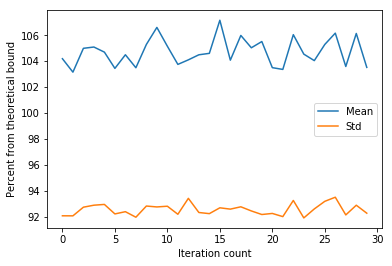

In [8]:
plt.xlabel('Iteration count')
plt.ylabel('Percent from theoretical bound')
plt.plot(percents_mean, label='Mean')
plt.plot(percents_std, label='Std')
plt.legend()
plt.show()

In [12]:
(std_bound ** 2 - mean_bound ** 2) ** 0.5 / std_bound

0.904534033733291

In [ ]:
# why 104 instead of 100 and 92 instead of 90?